<a href="https://colab.research.google.com/github/serenamlee/datasci/blob/main/Lee_Huang_Seyahi_Datathon_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Data collection and pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
degrees_overall = '/content/drive/MyDrive/Stanford Datathon/STEM_Degree_Conferral_Total.csv'
degrees_levels = '/content/drive/MyDrive/Stanford Datathon/STEM_Degree_Level_Gender.csv'
df_overall = pd.read_csv(degrees_overall)
df_levels = pd.read_csv(degrees_levels)

# Update all rows in df_levels where Degree_Type is "Associates" to "Associate's"
df_levels.loc[df_levels["Degree_Type"] == "Associates", "Degree_Type"] = "Associate's"
df_levels.loc[df_levels["Degree_Type"] == "Below Bacc", "Degree_Type"] = "Certificates below the baccalaureate level"
df_levels["Male_Percentage"] = (df_levels["Male"] / df_levels["Total"]) * 100
df_levels["Female_Percentage"] = (df_levels["Female"] / df_levels["Total"]) * 100

df = pd.read_csv('/content/drive/MyDrive/Stanford Datathon/Women_s_Representation_in_STEM_Occupations.csv')
df.head()

# 1. Exploratory Data Analysis With Data Commons


## 1.1 Determine at which stages the gender gap widens most significantly both in education or within the workforce.

##Findings:
Gender gaps can be found as early as High School in the types of STEM classes women vs men complete. More boys complete classes in engineering and physics while more girls complete chemistry and biology. This trend continues into higher education and into the workforce, as we see more women represented in healthcare jobs but underrepresented in other STEM jobs.

* Gender differences in high school STEM course completion are linked to the types of STEM careers men and women pursue. For example, biology courses tend to have higher female participation, which aligns with women’s preference for health-related careers.
* The gender gap is most pronounced in engineering and physics, both in terms of educational attainment and workforce representation.
* Women remain underrepresented in STEM education at all levels. The ratio of men to women across different degrees is widest in Associate's and Certificates below baccalaureate, while Bachelor's, Master's, Doctorate have a similar disparity at around 35-40% of STEM degrees but with the disparity increasing the higher the degree.

In [ ]:
# high school data published by NCES

# filtering dataset from the NCES data
filtered_data = {
    "Subject": ["Any Advanced Science & Engineering", "Advanced Biology", "Chemistry",
                "Advanced Environmental/Earth Science", "Physics", "Engineering"],
    "Male (%)": [86.7, 27.1, 71.9, 16.1, 40.9, 17.7],
    "Female (%)": [89.9, 43.2, 78.1, 15.6, 35.4, 5.7]
}

# Creating a DataFrame
filtered_df = pd.DataFrame(filtered_data)

# Calculating the gender gap for the filtered data
filtered_df['Gender Gap (%)'] = filtered_df['Female (%)'] - filtered_df['Male (%)']
# Assigning colors based on the gender gap
filtered_df['Color'] = filtered_df['Gender Gap (%)'].apply(lambda x: 'pink' if x > 0 else 'blue')

# Re-plotting with dynamic colors based on gender majority
plt.figure(figsize=(10, 6))
plt.barh(filtered_df['Subject'], filtered_df['Gender Gap (%)'], color=filtered_df['Color'])
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlabel('Gender Gap in Completion (%) (Female - Male)')
plt.title('Gender Gap in High School STEM Course Completion Rates (2019)')
plt.tight_layout()
plt.show()

In [ ]:
# Grouping the occupations into job clusters based on categories from the extracted data
clusters = {
    "Health-related jobs": [
        "Speech language pathologists", "Dental hygienists", "Dieticians and nutritionists",
        "Medical records and health information technicians", "Occupational therapists",
        "Registered nurses", "Licensed practical and licensed vocational nurses", "Audiologists",
        "Physician assistants", "Radiation therapists", "Pharmacists", "Physicians and surgeons", "Dentists"
    ],
    "Math jobs": [
        "Operations research analysts", "Miscellaneous mathematical scientists, incl. mathematicians, statisticians", "Actuaries"
    ],
    "Computer jobs": [
        "Database administrators", "Computer scientists, system analysts, web developers",
        "Computer programmers", "Software developers, applications and systems software",
        "Network and computer systems administrators"
    ],
    "Life science jobs": [
        "Medical scientists and life scientists, all other", "Biological scientists",
        "Agricultural and food scientists", "Conservation scientists and foresters"
    ],
    "Physical science jobs": [
        "Physical scientists, all other", "Chemists and materials scientists",
        "Environmental scientists and geoscientists", "Atmospheric and space scientists",
        "Geological and petroleum technicians, nuclear technicians", "Astronomers and physicists"
    ],
    "Engineering jobs": [
        "Environmental engineers", "Architects, except naval",
        "Industrial engineers, including health and safety",
        "Electrical and electronics engineers", "Mechanical engineers"
    ]
}

# Creating a new dataset with clusters and calculating mean percentages for clusters
clustered_data = []

for cluster, jobs in clusters.items():
    job_data = df[df['Occupation'].isin(jobs)]
    mean_women = job_data['Women (%)'].mean().round(2)
    for _, row in job_data.iterrows():
        clustered_data.append((cluster, row['Occupation'], row['Women (%)'], mean_women))

clustered_df = pd.DataFrame(clustered_data, columns=['Cluster', 'Occupation', 'Women (%)', 'Mean Women (%)'])

# Plotting similar visual style as the sample
plt.figure(figsize=(12, 8))
sns.stripplot(data=clustered_df, x='Women (%)', y='Cluster', hue='Mean Women (%)', jitter=True, palette='coolwarm', size=8)

# Customizing plot similar to the provided image style
plt.title('Women’s Representation Across STEM Fields', fontsize=14)
plt.xlabel('Percentage of Women in Occupation')
plt.ylabel('Job Types')
plt.axvline(x=47, color='black', linestyle='--', label='Overall Mean (47%)')
plt.legend(title='Cluster Mean Women %', loc='lower right')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Plot the percentage of degrees conferred to women for each specific degree type
degree_types = df_levels["Degree_Type"].unique()

plt.figure(figsize=(12, 8))
for degree_type in degree_types:
    subset = df_levels[df_levels["Degree_Type"] == degree_type]
    plt.plot(subset["Year"], subset["Female_Percentage"], label=f"Female: {degree_type}", marker="o")

plt.title("Percentage of STEM Degrees Conferred to Women by Degree Type Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of STEM Degrees Conferred to Women")
plt.xticks(rotation=45)
plt.legend(title="Degree Type", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# [DYNAMIC FEATURE: USER INPUT] -- change according to year you want to see!
year = "2021-22"

In [ ]:
# Plotting the stacked bar chart with percentages
plt.figure(figsize=(10, 8))

# Prepare data for the stacked bar chart
desired_order = [
    "Certificates below the baccalaureate level",
    "Associate's",
    "Bachelor's",
    "Master's",
    "Doctor's"
]

funnel_data_totals = df_levels[df_levels["Year"] == year].sort_values("Total", ascending=False)
funnel_data_totals = funnel_data_totals[["Degree_Type", "Male", "Female", "Total"]].set_index("Degree_Type")
funnel_data_totals = funnel_data_totals.reindex(desired_order)
funnel_data_percentages = funnel_data_totals.copy()
funnel_data_percentages["Male_Percentage"] = (funnel_data_percentages["Male"] / funnel_data_percentages["Total"]) * 100
funnel_data_percentages["Female_Percentage"] = (funnel_data_percentages["Female"] / funnel_data_percentages["Total"]) * 100

plt.barh(funnel_data_percentages.index, funnel_data_percentages["Male_Percentage"], color="lightblue", edgecolor="black", label="Male")
bars = plt.barh(funnel_data_percentages.index, funnel_data_percentages["Female_Percentage"],
                left=funnel_data_percentages["Male_Percentage"], color="pink", edgecolor="black", label="Female")

# Adding percentage labels over the pink bars (Female percentages)
for bar, female_percentage in zip(bars, funnel_data_percentages["Female_Percentage"]):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_y() + bar.get_height() / 2,
             f"{female_percentage:.1f}%",
             va="center", ha="center", fontsize=10, color="black", weight="bold")

plt.title(f"Gender Representation in STEM Across Educational Levels ({year})")
plt.xlabel("Percentage of Degrees Conferred")
plt.ylabel("Degree Type")
plt.legend(title="Gender", loc="upper right")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.2 General Exploration Plots using Data Commons:

Even in 2022, men tend to have higher median incomes than women with the same educational qualifications. Notably, men with lower degrees often earn more than women with higher degrees. This trend may reflect the undervaluation of women's work and educational achievements, as well as persistent gender disparities in pay practices.

**2022 Median Income By Gender By Degree**
1. Median Income: Graduate or Professional Degree, Male: 106K USD
2. Median Income: Bachelors Degree, Male: 79.1K USD
3. Median Income: Graduate or Professional Degree, Female: 72.9K USD
4. Median Income: Bachelors Degree, Female: 54.9K USD
5. Median Income: Some College or Associates Degree, Male: 53.3K USD
6. Median Income: High School Graduate Includes Equivalency, Male: 44.1K USD
7. Median Income: Some College or Associates Degree, Female: 36.3K USD
8. Median Income: Less Than High School Graduate, Male: 34.7K USD
9. Median Income: High School Graduate Includes Equivalency, Female: 29.5K USD
10. Median Income: Less Than High School Graduate, Female: 22.7K USD

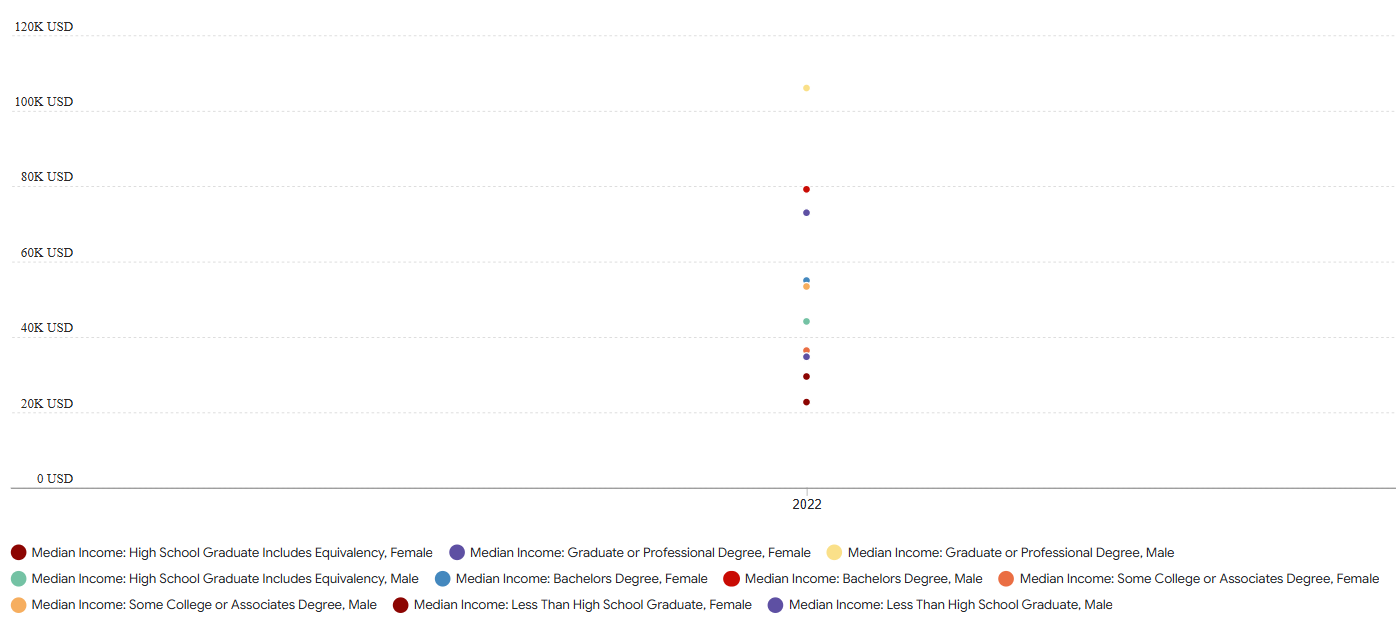

**Timelines of Population of Men and Women with Various Degrees**

The first timeline shows that more women than men earn bachelor's and master's degrees in the U.S., but this trend reverses for professional and doctorate degrees. Additionally, while the number of male high school graduates has increased, the number of female graduates has declined, recently falling below the male count—a surprising shift that may warrant further investigation.

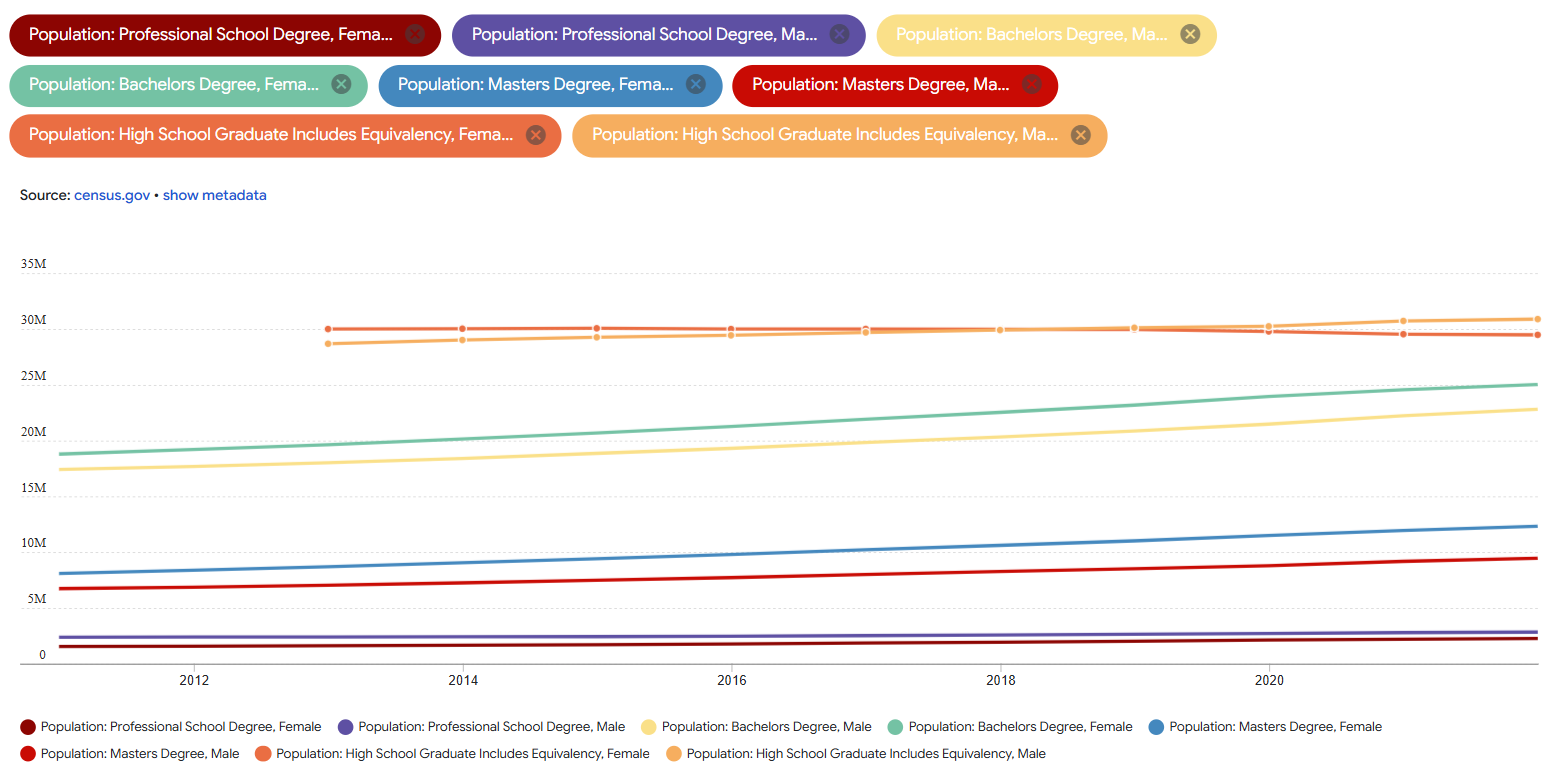


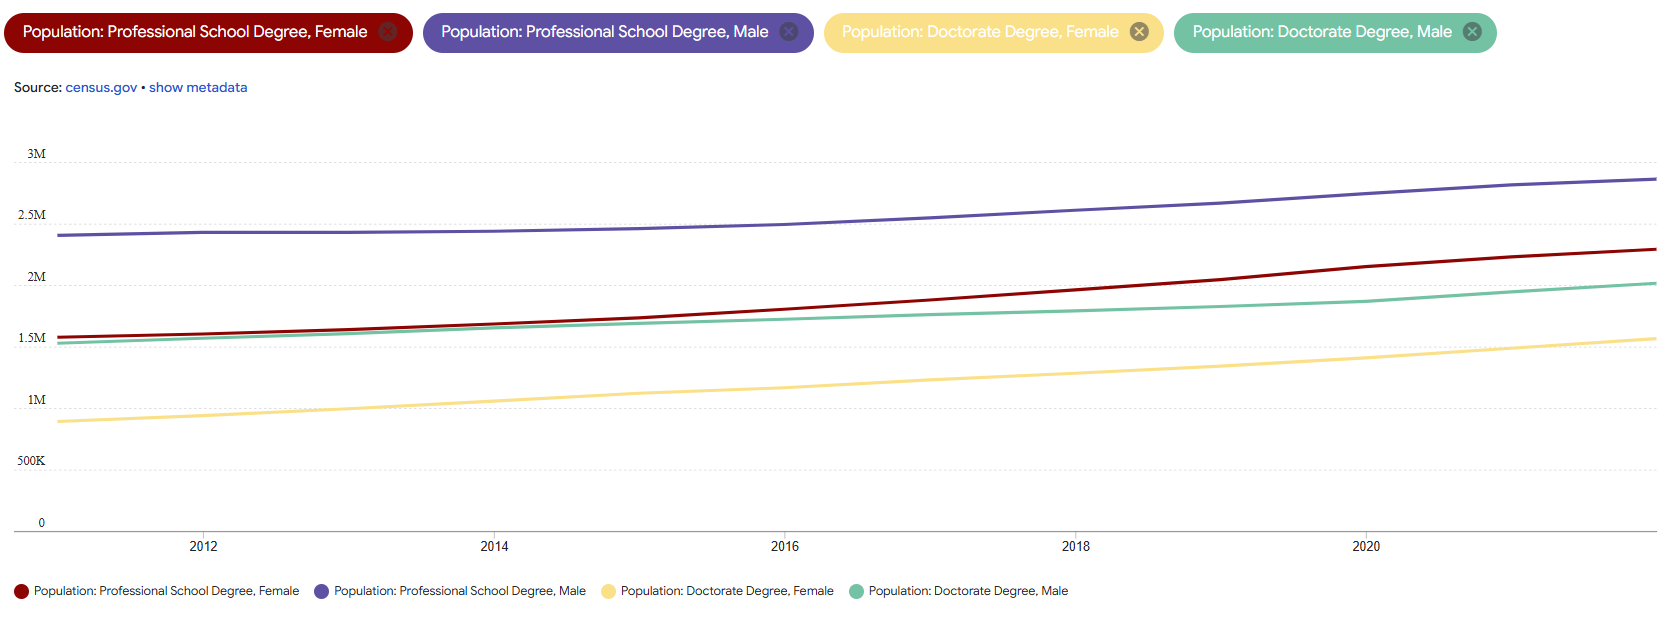

**Income Inequality Between Men and Women of Working Age**

The map of income inequality between men and women aligns closely with the map of fertility rates displayed in the next section, with Utah standing out as the state with both the highest income inequality and fertility rate. Fertility rates among women aged 15 and above appear to be a key factor in the gender gap in the workforce, including STEM fields, as women are often expected to be the primary caregivers. This aligns with research which shows that almost 50% of women leave the workforce after their first child.

Nature. (2019). Women in science: Figures still show gender gap. Nature, 567(7748), 14–15. https://doi.org/10.1038/d41586-019-00611-1

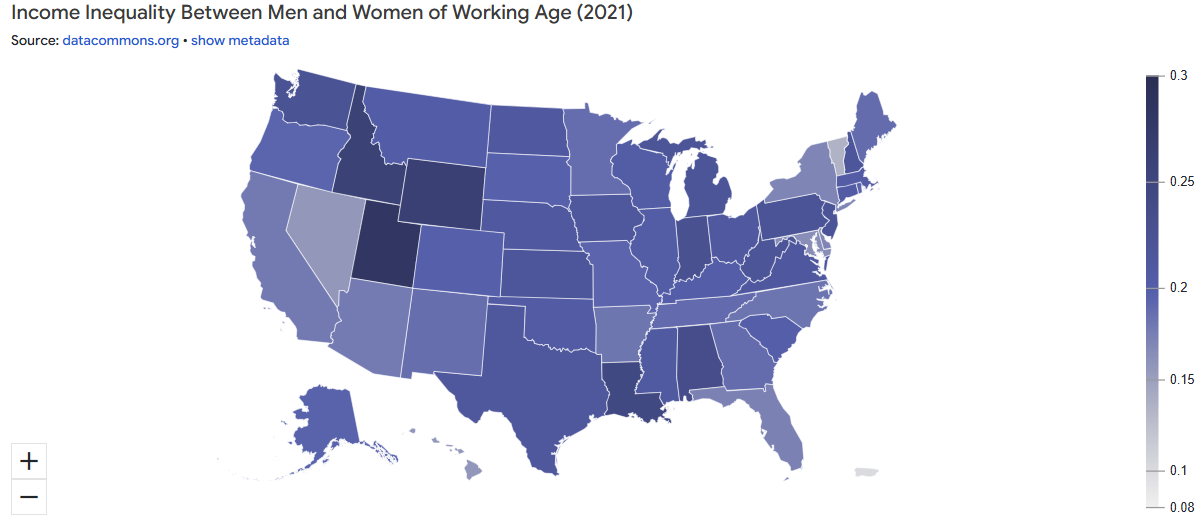

**Female Population With Bachelors Degree or Higher vs Household Median Income**

We also tried examining relationship of household median income to population of female population with Bachelors degrees or higher as higher family finanicial status could mean more money to support women in the family in obtaining higher education and less time for women to spend on housecare or supporting the family.

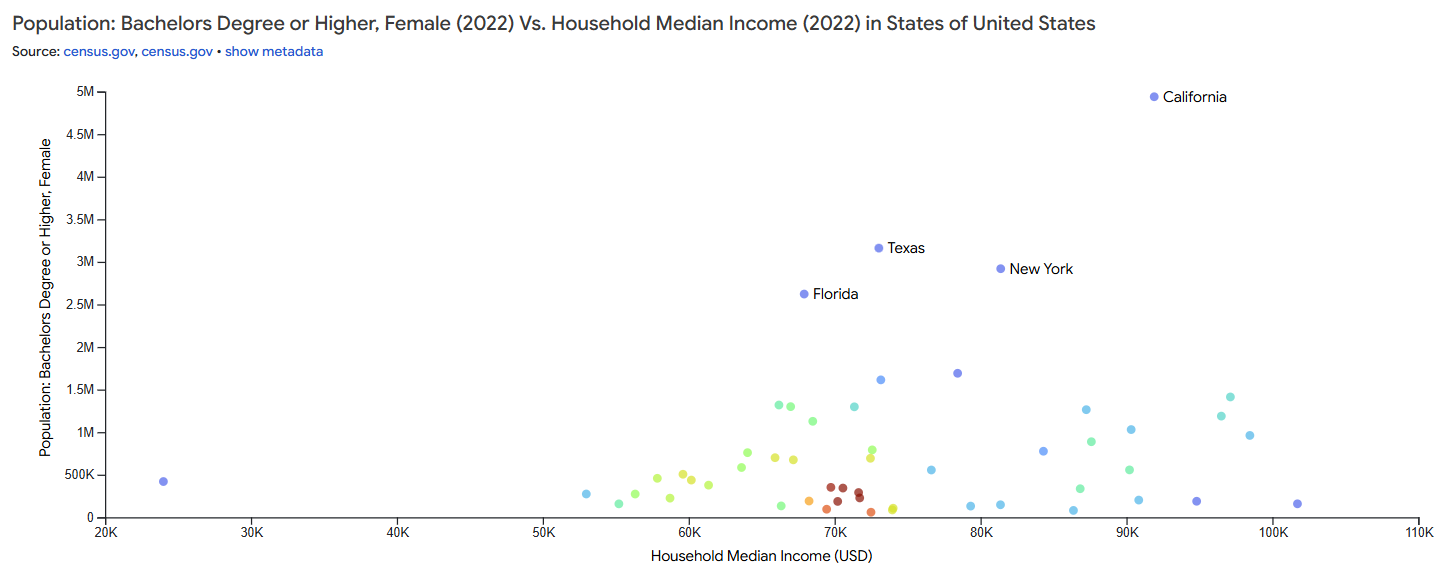

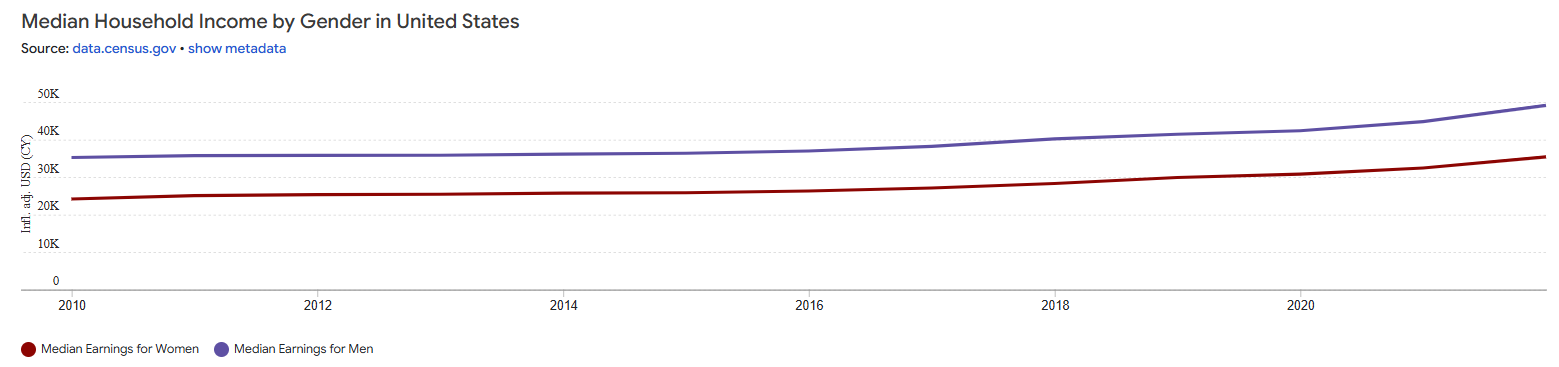

## 1.3 Initial Feature Explorations


We identified various potential key factors that could impact the gender gap, such as:
* Socioeconomic status of state/Poverty rate
* Fertility rate
* Teen birth rates
* Marriage rates
* Availability of Stem programs
* Per pupil spending/State spending on schools
* Average Family size
* Parental employment status/educational attainment
* Household median income
* Early literacy rates
* Religious leanings
* Political leanings
* Cost of living
* Private vs public schools
* Gender divide in teachers in STEM disciplines
* Gender pay gap in STEM jobs

We explored these factors using data commons and map visualizations. Some of our visualizations are displayed below.

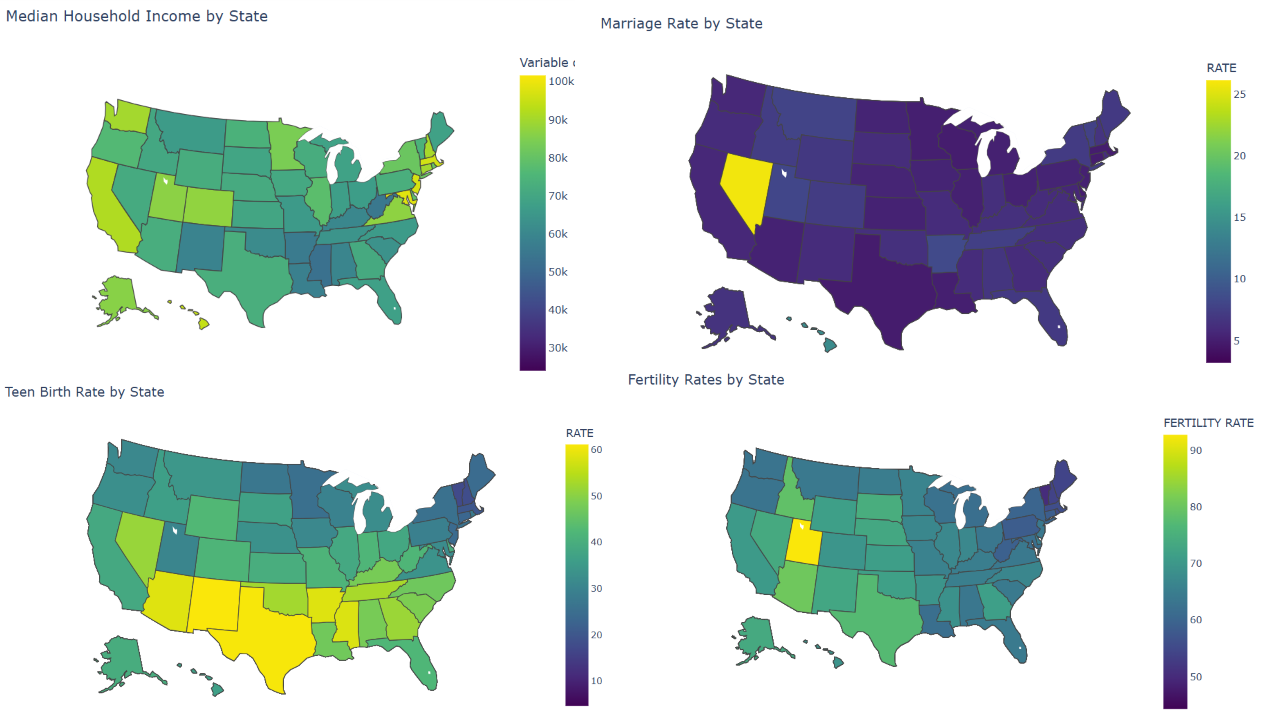

# 2. Machine Learning

* Using sources from Google Data Commons, we put together a dataset of male/female participation in the STEM workforce by state. We also included features measuring educational opportunities (per pupil spending, bachelor degree attainment by gender etc.) and workforce challenges (fertility rate, per pupil spending etc.).

## 2.1 Descriptive Analytics: PCA & Clustering

### Finding: There is strong evidence that per-pupil spending in K-12 education is a significant factor influencing female participation in the STEM workforce.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Stanford Datathon/final dataset/final_dataset_ml.csv')

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Preprocess dataset: remove percentage symbols, select features, and standardize
df['Percent of Employed Women in STEM Occupations'] = df['Percent of Employed Women in STEM Occupations'].str.replace('%', '').astype(float) / 100
df['Percent of Employed Men in STEM Occupations'] = df['Percent of Employed Men in STEM Occupations'].str.replace('%', '').astype(float) / 100
df['Women_Percent_Workforce_STEM'] = df['Women_Percent_Workforce_STEM'].str.replace('%', '').astype(float) / 100

# Final updated feature set (excluding population and state columns)
features = [
    'WomenWithBachelorsOrHigher', 'PercentageWomenBach',
    'MenWithBachelorsOrHigher', 'PercentageMenBach', 'FERTILITY RATE',
    'PerPupilSpendingPublicSpendingPerK-12Student',
    'PerPupilSpendingPublicFundingPerK-12Student', 'CostOfLivingIndex',
    'PerPupilSpendingK-12SpendingAsPercTaxpayerIncome',
    'PerPupilSpendingTeachersAsAPercentOfStaffSalaries',
    'PerPupilSpendingPublicEducationAveragePostSecondary',
    'LiteracyRatesPercofPopulationWithLowLiteracy',
    'LiteracyRatesPercof4thGradersBelowBasicReadingLevel',
    'AverageHouseholdSize', 'WageGap'
]

X = df[features].dropna()
y = df['Women_Percent_Workforce_STEM'].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)

# Linear Regression with Original Features
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

# Linear Regression with PCA-transformed Features
lr_pca = LinearRegression()
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)

# Evaluate Models
results = pd.DataFrame({
    'Model': ['Original Features', 'PCA-Transformed Features'],
    'R² Score': [r2_score(y_test, y_pred_original), r2_score(y_test, y_pred_pca)],
    'MSE': [mean_squared_error(y_test, y_pred_original), mean_squared_error(y_test, y_pred_pca)]
})

print(results)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a PCA biplot
def biplot(scores, loadings, labels, explained_variance, feature_names):
    plt.figure(figsize=(10, 7))
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, label='Samples')

    # Add feature vectors
    for i, (x, y) in enumerate(loadings[:, :2]):
        plt.arrow(0, 0, x * 2, y * 2, color='r', alpha=0.5, head_width=0.02)
        plt.text(x * 2.2, y * 2.2, feature_names[i], color='g', ha='center', va='center')

    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance explained)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance explained)')
    plt.title('PCA Biplot')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
# Identify the features contributing most to PC1

# Get the loadings for PC1 (the first principal component)
pc1_loadings = pca.components_[0]

# Create a DataFrame to sort and display the contributions of each feature to PC1
pc1_contributions = pd.DataFrame({
    'Feature': features,
    'PC1 Loading': pc1_loadings
}).sort_values(by='PC1 Loading', key=abs, ascending=False)

pc1_contributions_fixed = pd.DataFrame({
    'Feature': features,  # Using the correct feature list
    'PC1 Loading': pc1_loadings
}).sort_values(by='PC1 Loading', key=abs, ascending=False)

In [ ]:
pc1_contributions.sort_values(by='PC1 Loading', key=abs, ascending=False)

In [ ]:
# Filter the components and variables for the new biplot
selected_features = [
    'PercentageWomenBach',
    'PerPupilSpendingPublicSpendingPerK-12Student',
    'PerPupilSpendingPublicFundingPerK-12Student',
    'PercentageMenBach',
    'CostOfLivingIndex',
    'FERTILITY RATE',
    'WageGap',
    'PerPupilSpendingK-12SpendingAsPercTaxpayerIncome',
    'WomenWithBachelorsOrHigher',
    'MenWithBachelorsOrHigher',
    'LiteracyRatesPercof4thGradersBelowBasicReadingLevel',
    'LiteracyRatesPercofPopulationWithLowLiteracy',
    'PerPupilSpendingTeachersAsAPercentOfStaffSalaries',
    'AverageHouseholdSize'
]

# Indices of the selected features in the original dataset
selected_indices = [features.index(f) for f in selected_features]

# Filter the PCA components for the selected features
filtered_loadings = pca.components_[:, selected_indices]

# Plot the PCA biplot using the selected features
def filtered_biplot(scores, loadings, explained_variance, feature_names):
    plt.figure(figsize=(10, 7))
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, label='Samples')

    # Add feature vectors
    for i, (x, y) in enumerate(loadings[:, :2]):
        plt.arrow(0, 0, x * 2, y * 2, color='r', alpha=0.5, head_width=0.02)
        plt.text(x * 2.2, y * 2.2, feature_names[i], color='g', ha='center', va='center')

    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance explained)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance explained)')
    plt.title('PCA Biplot - Explained Variance for Gender Representation in STEM Workforce')
    plt.grid()
    plt.legend()
    plt.show()

filtered_biplot(X_pca, filtered_loadings.T, pca.explained_variance_ratio_, selected_features)


In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Use only the selected features from the final dataset for clustering
X_clustering = X[selected_features].dropna()

# Standardize the features for clustering
X_clustering_scaled = scaler.fit_transform(X_clustering)

# ----- K-Means Clustering -----
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(2, 11):  # Testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve to show WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Optimal number of clusters based on the Elbow method (manual inspection or silhouette score)
optimal_k = 3  # Assuming from elbow (can adjust)

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X_clustering_scaled)

# Evaluate clustering with silhouette score
silhouette_kmeans = silhouette_score(X_clustering_scaled, kmeans_labels)


In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Use only the selected features from the final dataset for clustering
X_clustering = X[selected_features].dropna()

# Standardize the features for clustering
X_clustering_scaled = scaler.fit_transform(X_clustering)

# ----- K-Means Clustering -----
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(2, 11):  # Testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve to show WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Optimal number of clusters based on the Elbow method (manual inspection or silhouette score)
optimal_k = 3  # Assuming from elbow (can adjust)

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X_clustering_scaled)

# Evaluate clustering with silhouette score
silhouette_kmeans = silhouette_score(X_clustering_scaled, kmeans_labels)

# ----- Hierarchical Clustering -----
# Perform Hierarchical Clustering and plot dendrogram
linked = linkage(X_clustering_scaled, method='ward')  # Ward minimizes variance


In [ ]:
# Visualize the K-Means clustering with state labels
plt.figure(figsize=(12, 8))
scatter_kmeans = plt.scatter(
    pca_results['PC1'], pca_results['PC2'],
    c=pca_results['KMeans Cluster'], cmap='viridis', alpha=0.6
)
pca_results['State'] = pca_results['State'].str.replace('US-', '')

plt.colorbar(scatter_kmeans, label='K-Means Cluster')
for i, txt in enumerate(pca_results['State']):
    plt.text(pca_results['PC1'][i] + 0.02, pca_results['PC2'][i], txt, fontsize=8)
plt.title('PCA of Factors Impacting Gender Representation in STEM Workforce (K-Means Clustering of States)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Observations from interpreting the PCA/clusters:
We used the PCA to create a biplot where the first two principal components (PC1 and PC2) are used to represent states in a 2D space. The clusters were obtained using K-means clustering, and each state is color-coded by its respective cluster. The PCA and the clustering of these states suggests a strong primary driver of STEM workforce outcomes begin in education.

Interpreting the clusters:
* Cluster 1 (e.g., NY, MA, NJ, CT): States in this cluster tend to cluster tightly, suggesting they may share high STEM participation rates or strong policies promoting gender equity and education. Many of these states are in the Northeastern US -- oftentimes school with the highest spending per pupil are concentrated in the Northeastern US.
* Cluster 2 (e.g., CA, TX, FL): These are outlier, high-population states with possibly unique challenges or opportunities related to STEM workforce diversity. The spatial distance of CA, TX, and FL suggests they may differ even within this group --  suggesting unique characteristics (e.g., policies or demographic differences) not shared by other states.
*Cluster 3 (e.g., WY, ND, SD, MT): States in this cluster might have lower STEM workforce participation overall or differing gender representation factors compared to others.

In [ ]:
# see correlation between PC1 variables
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.show()

## 2.2: Machine Learning Model



We developed a machine learning model to analyze factors influencing the underrepresentation of women in STEM fields, in which we defined as the percentage of women in STEM occupations (Women_Percent_Workforce_STEM column in the dataset).  The model leveraged a variety of input features to identify key drivers of underrepresentation and offer insights for targeted interventions. We used Random Forest Regression model and mean squared error loss as our loss function.

The input features included data on the gender pay gap across states, which helps assess economic disparities between men and women in the workforce. We incorporated the fertility rate, which can influence women’s ability to balance family life and career progression.

Educational factors were also considered, such as the percentage of women and men with a bachelor’s degree or higher, which provides an indication of women’s access to higher education and helps us understand gender disparities in education. We also analyzed per pupil spending and early literacy rates, which reflect the quality of education, especially for young girls, that could impact their future participation in STEM fields. Income inequality data and average household size were included to capture the economic environment and how disparities in income may affect career choices and persistence in STEM.
To understand the factors influencing the representation of women in STEM fields, we trained two versions of our machine learning model.

Initially, we included all input features—such as gender pay gap, fertility rates, education statistics, income inequality, and literacy rates—in training the model. This provided a baseline for understanding how all factors collectively influence the percentage of women in STEM fields. Subsequently, we applied Principal Component Analysis (PCA) to reduce dimensionality and identify the features that contributed the most to the variance of the principal components. We then trained a second version of the model using only these most impactful features, and this model obtained a mean squared error loss of 0.0016.

Both versions were evaluated for their predictive performance, and the comparison allowed us to determine whether focusing on key drivers identified by PCA improved the model's accuracy or interpretability. By testing these two approaches, we aimed to balance the trade-off between model complexity and the clarity of insights derived from the results.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
# the output variable
target_column = 'Women_Percent_Workforce_STEM'

# Columns to convert
percent_columns = ['Percent of Employed Women in STEM Occupations', 'Percent of Employed Men in STEM Occupations', 'Women_Percent_Workforce_STEM']  # Replace with the actual column names

# Convert percentage columns to decimal
for col in percent_columns:
    df[col] = df[col].str.replace('%', '').astype(float) / 100

In [ ]:
# Features for the 1st model

# Specify the columns to exclude
exclude_columns = ['State', 'Women_Percent_Workforce_STEM', 'WomenWithBachelorsOrHigher', 'WomenPopulation', 'MenWithBachelorsOrHigher', 'MenPopulation', ]  # Replace with actual column names
# Create feature columns by excluding the specified columns
feature_columns = [col for col in df.columns if col not in exclude_columns]


In [ ]:
# Features for the 2nd model, using information from the PCA analysis
feature_columns = ["PercentageWomenBach", "PerPupilSpendingPublicFundingPerK-12Student", "PerPupilSpendingPublicSpendingPerK-12Student", "PercentageMenBach", "CostOfLivingIndex", "FERTILITY RATE", "WageGap", "PerPupilSpendingK-12SpendingAsPercTaxpayerIncome", "WomenWithBachelorsOrHigher", "MenWithBachelorsOrHigher", "LiteracyRatesPercof4thGradersBelowBasicReadingLevel", "LiteracyRatesPercofPopulationWithLowLiteracy" ]

In [ ]:
X = df[feature_columns]  # Input features
y = df[target_column]    # Target column

In [ ]:
# Standardize the data
scaler = StandardScaler()
df = df.drop(columns=['State'])  # Specify the column to drop
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display results
print("PCA Components (Transformed Data):")
print(X_pca)
print("\nExplained Variance Ratio:")
print(explained_variance)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Use a Random Forest model (or any other suitable model)
model = RandomForestRegressor(random_state=42)
# model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print(y_pred)
print(y_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

2.3 Correlation Matrix
We analyzed the correlation between various features in our model, and created a corrlation matrix. Correlation analysis can produce insights that help inform policy-making.

## Data Sources & Acknowledgements:
This project would not be possible without the data and important contributions made by these amazing teams:

* Google Data Commons
* U.S. Department of Education, National Center for Education Statistics, Integrated Postsecondary Education Data System (IPEDS), Completions component, Fall 2012 through Fall 2021 (final data) and Fall 2022 (provisional data). (This table was prepared October 2023.)
* National Center for Science and Engineering Statistics. (2023). Data tables: Women, minorities, and persons with disabilities in science and engineering: 2023 (NSF 23-315). National Science Foundation. https://ncses.nsf.gov/pubs/nsf23315/data-tables
* U.S. Department of Education, National Center for Education Statistics. (n.d.). Fast facts: Advanced mathematics courses. Retrieved November 15, 2024, from https://nces.ed.gov/fastfacts/display.asp?id=1089#:~:text=Among%20public%20and%20private%20high,took%20any%20advanced%20mathematics%20course
* Else, H. (2019). Nearly half of US female scientists leave full-time science after first child. Nature, 566(7744), 567–568. https://doi.org/10.1038/d41586-019-00611-1
* World Economic Forum. (2023). Global gender gap report 2023. World Economic Forum. https://www3.weforum.org/docs/WEF_GGGR_2023.pdf
* Corrigan, E., Williams, M., & Wells, M. A. (2023). High school enrolment choices—Understanding the STEM gender gap. SN Social Sciences, 3(7), 1–20. https://doi.org/10.1007/s42330-023-00285-y
* National Center for Science and Engineering Statistics. (2023). STEM occupations: A report on representation in science, engineering, and middle-skill occupations. National Science Foundation. https://ncses.nsf.gov/pubs/nsf23315/report/stem-occupations#representation-in-s-e-s-e-related-and-middle-skill-occupations


